In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# load predicted values from the previous 6-fold cross-validation as df
bert_1 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/esol_bert_ds6_fold1_results.csv')
bert_2 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/esol_bert_ds5_fold2_results.csv')
bert_3 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/esol_bert_ds4_fold3_results.csv')
bert_4 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/esol_bert_ds3_fold4_results.csv')
bert_5 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/esol_bert_ds2_fold5_results.csv')
bert_6 = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune2/esol_bert_ds1_fold6_results.csv')
# concat the data
bert = pd.concat((bert_1, bert_2, bert_3, bert_4, bert_5, bert_6), axis=0)

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(bert['exp'], bert['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(bert['exp'], bert['predict'])))

# R^2 Coefficient of Determination
print(r2_score(bert['exp'], bert['predict']))

0.6765747040353146
0.8493293067476206
0.8357363452414919


In [4]:
len(bert)

1144

In [5]:
# calculate the residual value for each molecule
bert['residual']= bert['predict']-bert['exp']

In [6]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((bert['residual']**2).sum()/(len(bert)-2))
sdr

0.8500727023444217

In [7]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
bert['std_residual'] = bert['residual']/sdr
bert['std_residual']

0     -0.987995
1     -1.229192
2     -1.194475
3     -0.409980
4     -0.545805
         ...   
186   -0.602725
187    0.771351
188    0.650634
189   -0.345423
190   -2.482263
Name: std_residual, Length: 1144, dtype: float64

In [8]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
bert_outliers = bert.loc[abs(bert['std_residual']) > n]
bert_outliers

,Unnamed: 0,smiles,exp,predict,residual,std_residual
160,160,Cc1cc(C)c(C)c(C)c1C,-4.000,-6.591702,-2.591702,-3.048800
169,169,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,-11.600,-8.234831,3.365169,3.958684
105,105,CNC(=O)C(C)SCCSP(=O)(OC)(OC),1.144,-2.519071,-3.663071,-4.309127
167,167,CCOP(=S)(OCC)Oc1ccc(cc1)S(C)=O,-2.300,-5.259432,-2.959432,-3.481387


In [9]:
# Set the default text font size
plt.rc('font', size=22)

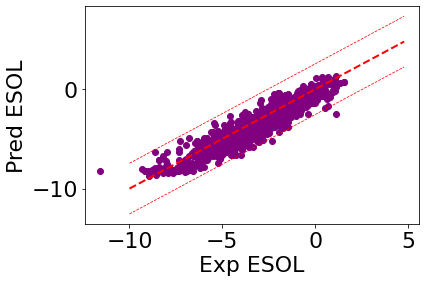

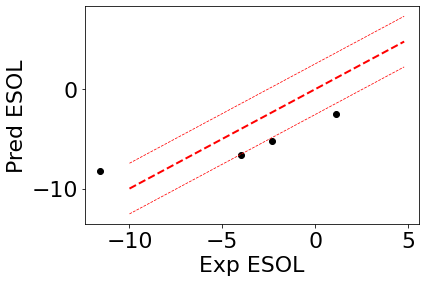

In [10]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['exp'], y=bert['predict'], color='purple')
plt.xlabel('Exp ESOL')
plt.ylabel('Pred ESOL')
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers['exp'], y=bert_outliers['predict'], color='black')
plt.xlabel('Exp ESOL')
plt.ylabel('Pred ESOL')
plt.show()

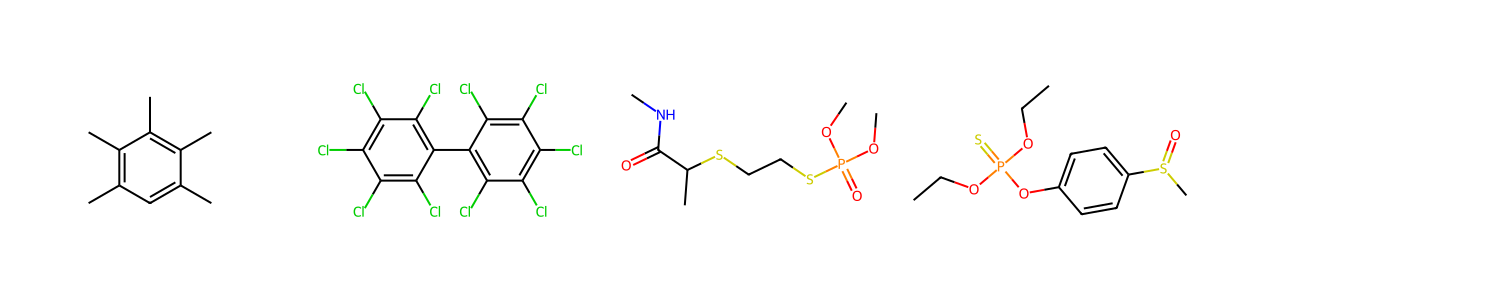

In [11]:
outliners = [Chem.MolFromSmiles(x) for x in bert_outliers['smiles']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [12]:
bert_outliers2.to_csv('bert2_esol_outliers3.csv')

NameError: name 'bert_outliers2' is not defined

In [13]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
bert_outliers2 = bert.loc[abs(bert['std_residual']) > n]
bert_outliers2

,Unnamed: 0,smiles,exp,predict,residual,std_residual
129,129,Cc1cc(cc(N(=O)=O)c1O)N(=O)=O,-1.456,-3.803607,-2.347607,-2.761654
174,174,CCOP(=S)(OCC)N2C(=O)c1ccccc1C2=O,-3.350,-5.767129,-2.417129,-2.843437
17,17,O=N(=O)OCC(CON(=O)=O)ON(=O)=O,-2.220,-0.438256,1.781744,2.095990
30,30,CCCC1COC(Cn2cncn2)(O1)c3ccc(Cl)cc3Cl,-3.493,-5.223281,-1.730281,-2.035451
65,65,Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4,-2.900,-4.841953,-1.941953,-2.284456
124,124,Cc1c(C)c(C)c(C)c(C)c1C,-5.230,-7.390035,-2.160035,-2.541000
156,156,ClC(Cl)C(Cl)Cl,-1.740,-3.938396,-2.198396,-2.586127
174,174,CN(C)c2c(C)n(C)n(c1ccccc1)c2=O,-0.364,-2.474631,-2.110631,-2.482882
184,184,Cc1cc(=O)n(c2ccccc2)n1C,0.715,-1.735778,-2.450778,-2.883022
23,23,CN2C(=O)CN=C(c1ccccc1)c3cc(Cl)ccc23,-3.754,-5.472552,-1.718552,-2.021653


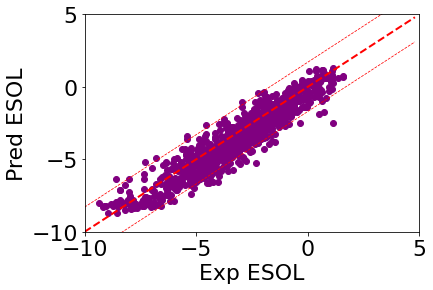

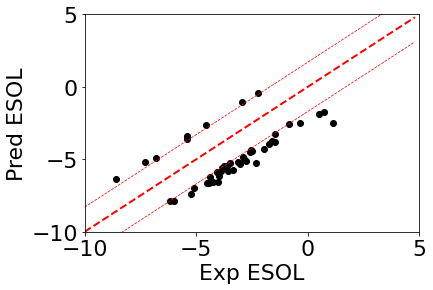

In [14]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement.
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert['exp'], y=bert['predict'], color='purple')
plt.xlabel('Exp ESOL')
plt.ylabel('Pred ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=bert_outliers2['exp'], y=bert_outliers2['predict'], color='black')
plt.xlabel('Exp ESOL')
plt.ylabel('Pred ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

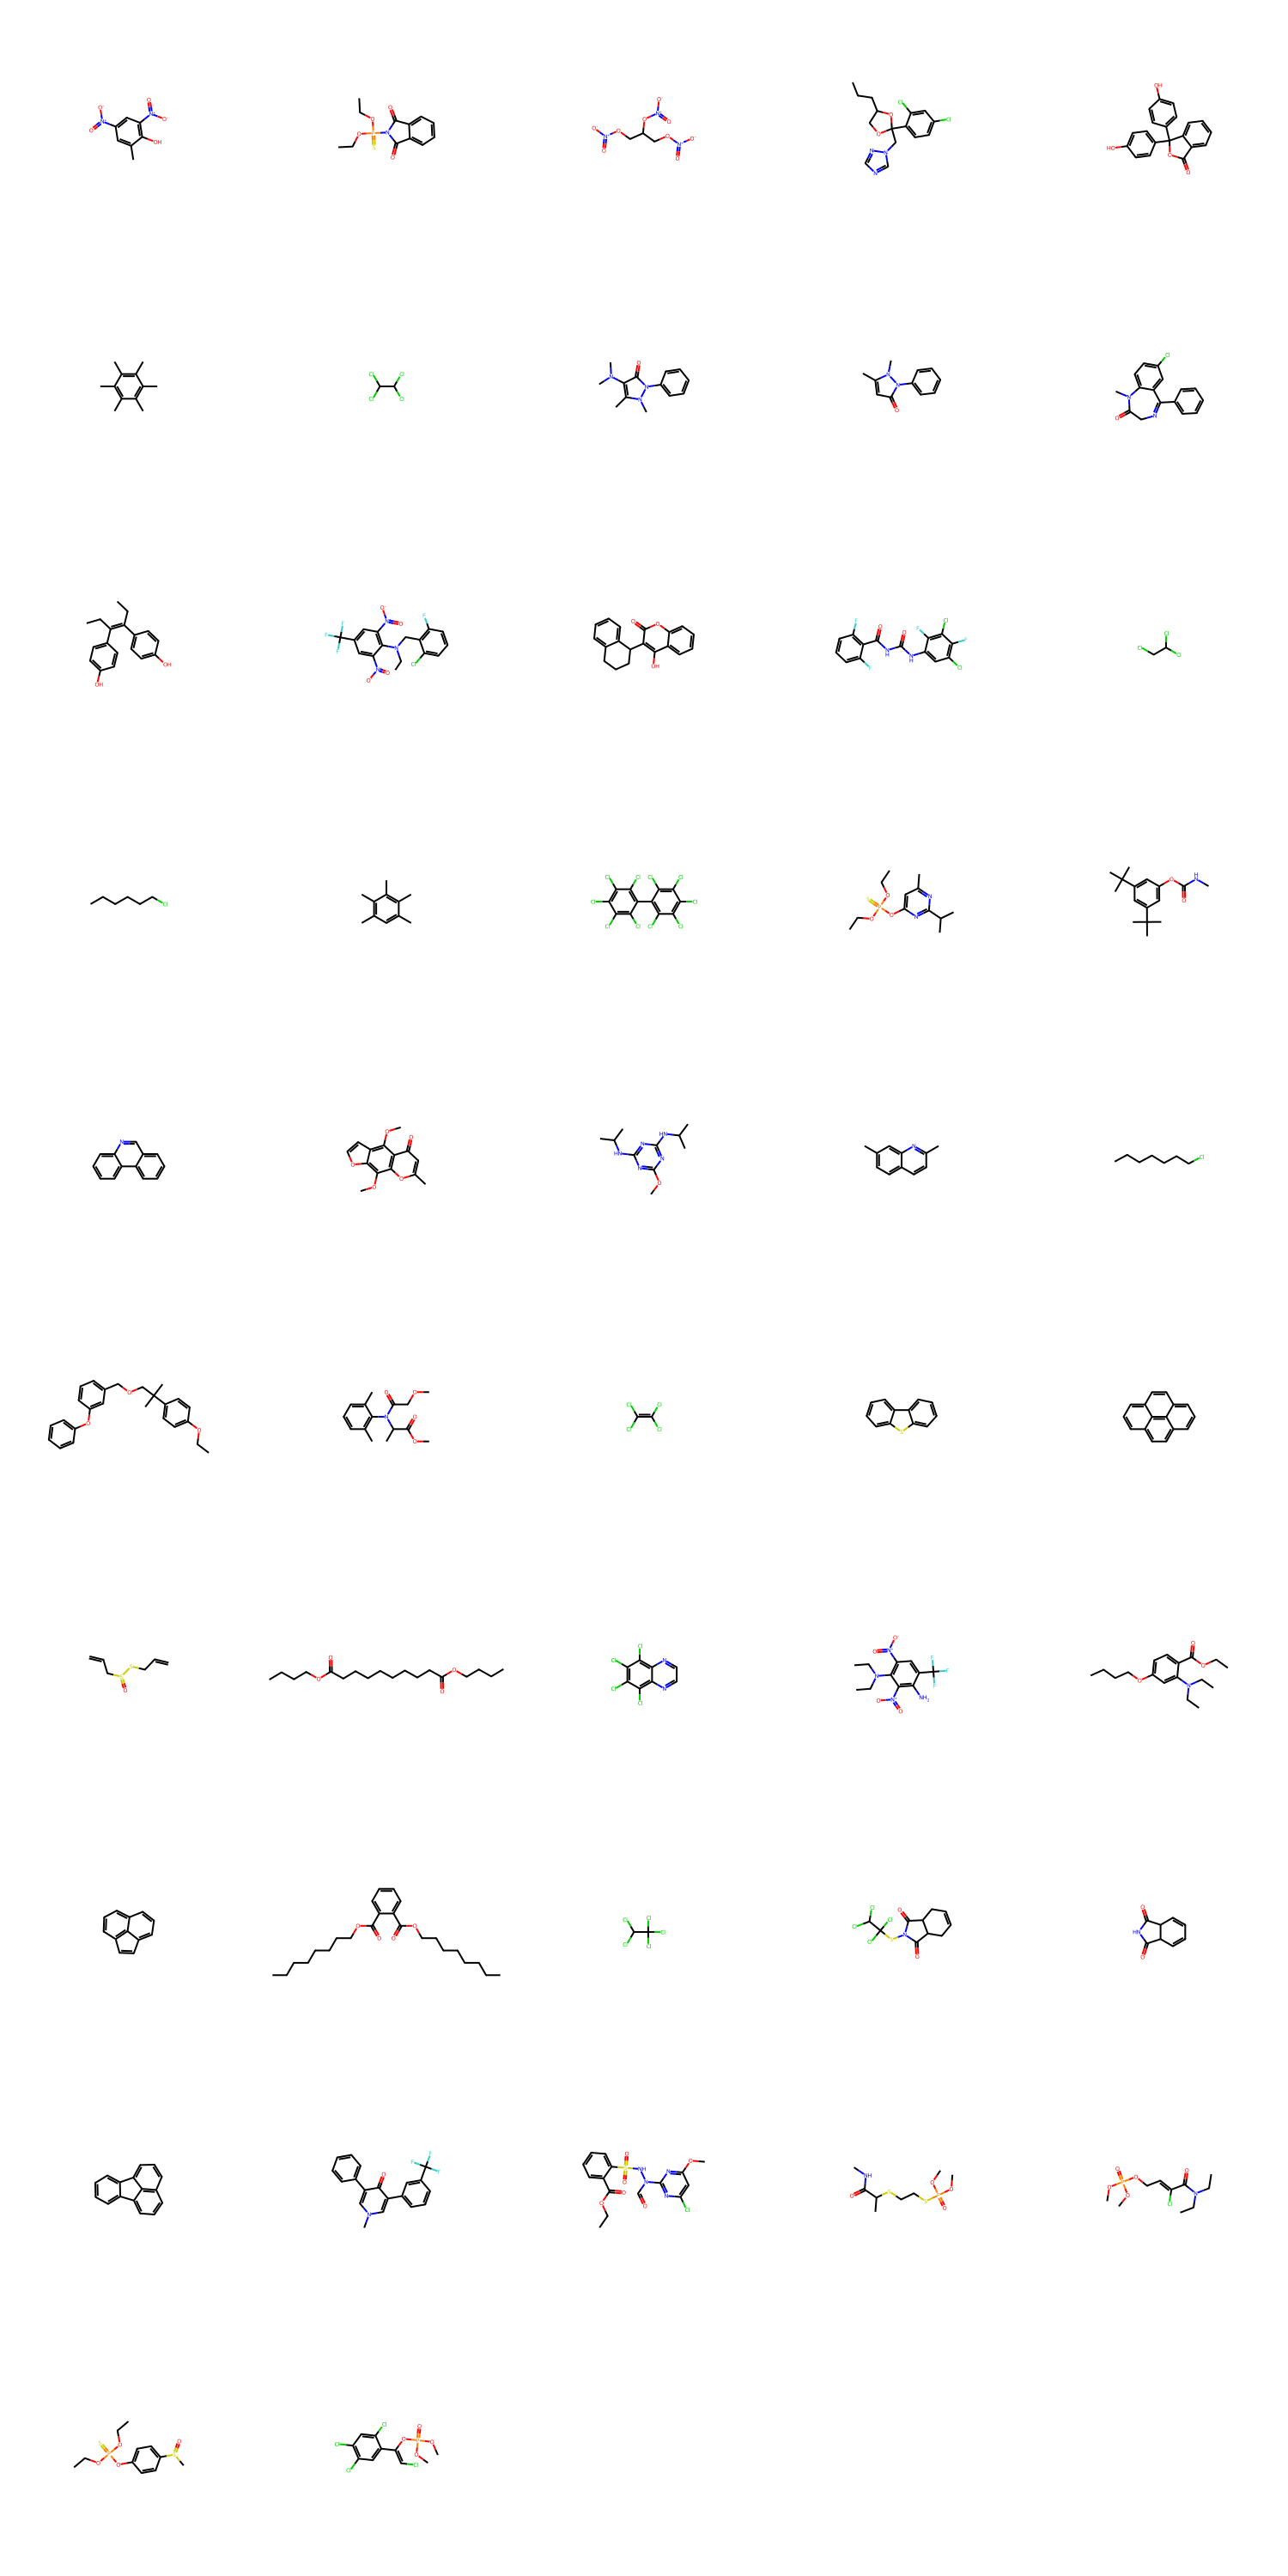

In [15]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in bert_outliers2['smiles']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [16]:
# save outliers (n=2) info to a csv file
bert_outliers2.to_csv('bert2_esol_outliers2.csv')

In [17]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in bert_outliers2['smiles']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

204.1519488730402
259.50251082527666


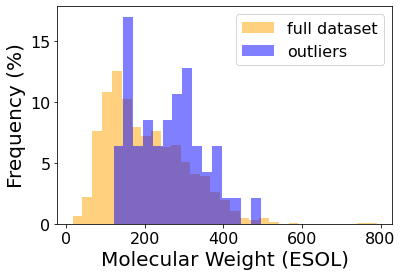

In [18]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (ESOL)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()